In [22]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from skorch import NeuralNetClassifier
from torch.utils.data import random_split
from skorch.helper import SliceDataset
from torch.utils.data.dataloader import DataLoader
from torchvision.utils import make_grid


import torchvision.transforms as transforms
import torchvision.datasets as datasets

Length of Train Data : 248
Length of Validation Data : 61


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


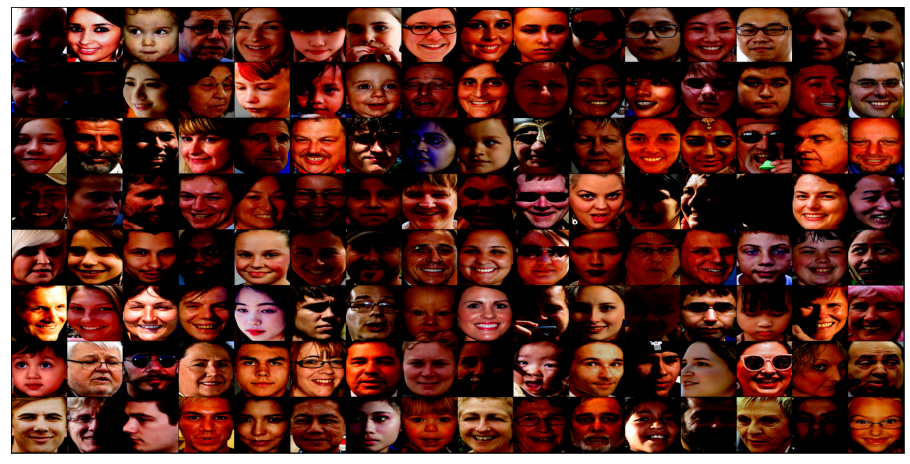

In [23]:
#normalizing
transform = transforms.Compose(
[transforms.ToTensor(),
transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

all_dataset = datasets.ImageFolder(
    root='input/masks/train',transform = transform)

m = len(all_dataset)
batch_size = 128

train_data,val_data = random_split(all_dataset,[int(m - m * 0.2)+1, int(m * 0.2)])
print(f"Length of Train Data : {len(train_data)}")
print(f"Length of Validation Data : {len(val_data)}")

#load the train and validation into batches.
train_dl = DataLoader(train_data, batch_size, shuffle = True, num_workers = 4, pin_memory = True)
val_dl = DataLoader(val_data, batch_size*2, num_workers = 4, pin_memory = True)


def show_batch(dl):
    """Plot images grid of single batch"""
    for images, labels in dl:
        fig,ax = plt.subplots(figsize = (16,12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
        break
        
show_batch(train_dl)      